In [305]:
using LinearAlgebra
using Statistics
using Plots
using Distributions
using Random

In [306]:
X = rand(1000, 5)

1000×5 Array{Float64,2}:
 0.554065   0.0614914  0.881296   0.102021   0.785197
 0.690045   0.323578   0.158047   0.665945   0.822732
 0.317171   0.710961   0.981737   0.242003   0.504672
 0.25144    0.749892   0.540868   0.523161   0.0284048
 0.988741   0.744598   0.369539   0.855585   0.456628
 0.262021   0.630986   0.378669   0.503879   0.229057
 0.0525689  0.0986615  0.357666   0.985626   0.657544
 0.11229    0.281793   0.127493   0.0522758  0.113489
 0.0758169  0.53166    0.283927   0.306941   0.968074
 0.682331   0.148906   0.255587   0.0075445  0.769991
 0.18723    0.895049   0.957974   0.353127   0.203196
 0.554925   0.968725   0.660787   0.653758   0.986455
 0.787696   0.198414   0.932447   0.135131   0.218247
 ⋮                                           
 0.304391   0.983046   0.109047   0.125588   0.898636
 0.263859   0.0608994  0.826025   0.568345   0.489535
 0.256207   0.626522   0.271097   0.297426   0.479092
 0.83104    0.903053   0.0148201  0.172721   0.122202
 0.758308 

In [307]:
X̂ = X .- mean(X,dims=1)

1000×5 Array{Float64,2}:
  0.0577641  -0.441796   0.368613   -0.385472    0.280037
  0.193744   -0.179709  -0.354636    0.178452    0.317572
 -0.17913     0.207674   0.469055   -0.24549    -0.000488794
 -0.244861    0.246605   0.0281852   0.0356682  -0.476756
  0.49244     0.241311  -0.143144    0.368092   -0.0485321
 -0.23428     0.127699  -0.134013    0.0163859  -0.276104
 -0.443732   -0.404626  -0.155016    0.498133    0.152384
 -0.384011   -0.221494  -0.385189   -0.435217   -0.391671
 -0.420484    0.028373  -0.228756   -0.180552    0.462913
  0.18603    -0.354381  -0.257096   -0.479948    0.264831
 -0.309071    0.391762   0.445292   -0.134366   -0.301964
  0.0586234   0.465438   0.148104    0.166265    0.481295
  0.291395   -0.304873   0.419765   -0.352362   -0.286914
  ⋮                                             
 -0.19191     0.479759  -0.403635   -0.361905    0.393475
 -0.232442   -0.442388   0.313343    0.0808518  -0.0156253
 -0.240095    0.123235  -0.241585   -0.190066   -0.

In [308]:
cov(X̂)

5×5 Array{Float64,2}:
  0.0815696    0.00168599   -0.00186876   -0.0030241     0.00164234
  0.00168599   0.0806525     0.000146152  -0.000342677  -0.0011495
 -0.00186876   0.000146152   0.0831351    -0.000139104  -0.000505684
 -0.0030241   -0.000342677  -0.000139104   0.0862449    -0.000272614
  0.00164234  -0.0011495    -0.000505684  -0.000272614   0.0833234

In [309]:
X̂'*X̂/1000

5×5 Array{Float64,2}:
  0.081488     0.00168431   -0.00186689   -0.00302107    0.0016407
  0.00168431   0.0805718     0.000146006  -0.000342334  -0.00114835
 -0.00186689   0.000146006   0.083052     -0.000138964  -0.000505178
 -0.00302107  -0.000342334  -0.000138964   0.0861586    -0.000272341
  0.0016407   -0.00114835   -0.000505178  -0.000272341   0.0832401

In [310]:
values, vectors = eigen(cov(X̂))

Eigen{Float64,Float64,Array{Float64,2},Array{Float64,1}}
values:
5-element Array{Float64,1}:
 0.07793589083442999
 0.08119076763119788
 0.08310657076103138
 0.08449411631448363
 0.08819812307415073
vectors:
5×5 Array{Float64,2}:
 -0.705722  0.404937  -0.187337   0.226377   0.501639
  0.548261  0.721228  -0.379864  -0.148082   0.114083
 -0.246256  0.413391   0.610378  -0.602873  -0.180135
 -0.228604  0.314171  -0.138047   0.411848  -0.812626
  0.297429  0.215083   0.654974   0.627495   0.206239

In [311]:
order = sortperm(values, rev = true)
θ = vectors[:,order]

5×5 Array{Float64,2}:
  0.501639   0.226377  -0.187337  0.404937  -0.705722
  0.114083  -0.148082  -0.379864  0.721228   0.548261
 -0.180135  -0.602873   0.610378  0.413391  -0.246256
 -0.812626   0.411848  -0.138047  0.314171  -0.228604
  0.206239   0.627495   0.654974  0.215083   0.297429

In [312]:
Z = X̂*θ[:,1:2]

1000×2 Array{Float64,2}:
  0.283174    -0.126763
  0.061051     0.557041
  0.0487311   -0.455496
 -0.227086    -0.393413
 -0.00878852   0.283185
 -0.149074    -0.157658
 -0.614199     0.353697
  0.124374    -0.246927
  0.075704     0.254637
  0.54384      0.218101
 -0.143649    -0.641253
  0.0199776    0.225546
  0.262946    -0.46711
  ⋮           
  0.406415     0.226707
 -0.29244     -0.152522
  0.0862127   -0.0215919
  0.480018    -0.0532154
  0.154931     0.586338
  0.32525     -0.125436
 -0.187568     0.0511605
  0.356794     0.132854
  0.358317     0.280446
 -0.00673696  -0.510023
 -0.147042    -0.458385
  0.292362    -0.268012

In [313]:
A=Z[m[:],1:end]

1000×2 Array{Float64,2}:
 -0.44367     -0.0894188
  0.0360134   -0.248573
 -0.0642572   -0.0965935
 -0.494516    -0.0916815
  0.126744     0.0242863
 -0.155107    -0.208505
 -0.177335    -0.461675
  0.0720932   -0.112768
 -0.704044    -0.254301
  0.332346     0.287356
 -0.52886     -0.0680025
  0.287977    -0.0335279
  0.196469    -0.258296
  ⋮           
 -0.445268    -0.345263
  0.0328672    0.603015
 -0.00517683  -0.167882
 -0.233815     0.0526696
 -0.0898802   -0.372959
  0.281021     0.0148919
  0.125475     0.140966
 -0.119058    -0.414274
 -0.158861     0.276907
 -0.255946     0.343067
 -0.0982223    0.642991
 -0.468593    -0.538115

In [314]:
cov(X̂*θ)

5×5 Array{Float64,2}:
  0.0881981     3.11174e-18  -2.21156e-17   4.11194e-18  -2.35047e-17
  3.11174e-18   0.0844941    -5.94564e-17  -1.20024e-17  -8.44614e-18
 -2.21156e-17  -5.94564e-17   0.0831066     3.334e-18    -2.22267e-19
  4.11194e-18  -1.20024e-17   3.334e-18     0.0811908     6.66801e-18
 -2.35047e-17  -8.44614e-18  -2.22267e-19   6.66801e-18   0.0779359

In [315]:
function clustering(X̂,K,maxIterations=10)
    scores = zeros(K,1000)
    ŷ = rand(1:K,(1,1000))
    μ = X̂[1:K,:]
    for _ = 1:maxIterations
        for k = 1:K
            a = X̂ .- μ[k,:]'
            scores[k,:] = sum(a.*a,dims=2)[:]
        end
        indexs = argmin(scores, dims=1)[:]
        ŷ = map(i -> (indexs[i])[1],1:1000)
        for k = 1:K
            μ[k,:] = mean(X̂[ŷ .== k,:],dims=1)
        end
    end
    μ, ŷ, scores
end

clustering (generic function with 2 methods)

In [328]:
# Number of cluster : K
K = 3
@time μ_0, ŷ, scores = clustering(Z,K,20)

  0.001446 seconds (1.29 k allocations: 4.355 MiB)


([0.3080416068619721 0.0374342362623868; -0.20585363677209315 0.25388729775559166; -0.12163176747867992 -0.28363383881780985], [1, 2, 3, 3, 2, 3, 2, 3, 2, 1  …  1, 1, 2, 1, 2, 1, 1, 3, 3, 1], [0.026590442020047057 0.3336729057703257 … 0.44936300622778724 0.09174220130724874; 0.38407871411430894 0.16218128998692405 … 0.512072715204651 0.5208913732111096; 0.19149398901782821 0.7401362879152661 … 0.03129963099957293 0.1749730972876852])

In [329]:
μ_0'

2×3 Adjoint{Float64,Array{Float64,2}}:
 0.308042   -0.205854  -0.121632
 0.0374342   0.253887  -0.283634

In [330]:
scores

3×1000 Array{Float64,2}:
 0.0265904  0.333673  0.306958   0.468676   …  0.39513   0.449363   0.0917422
 0.384079   0.162181  0.569037   0.42072       0.624389  0.512073   0.520891
 0.191494   0.740136  0.0602546  0.0225275     0.065794  0.0312996  0.174973

In [331]:
colors =["purple","blue","green","black","orange ","yellow","gray","red","pink"]

9-element Array{String,1}:
 "purple"
 "blue"
 "green"
 "black"
 "orange "
 "yellow"
 "gray"
 "red"
 "pink"

In [332]:
y = rand(1:K,(1,1000))

1×1000 Array{Int64,2}:
 2  3  1  2  1  2  2  2  2  1  3  1  1  …  3  3  1  3  2  2  1  2  3  1  1  3

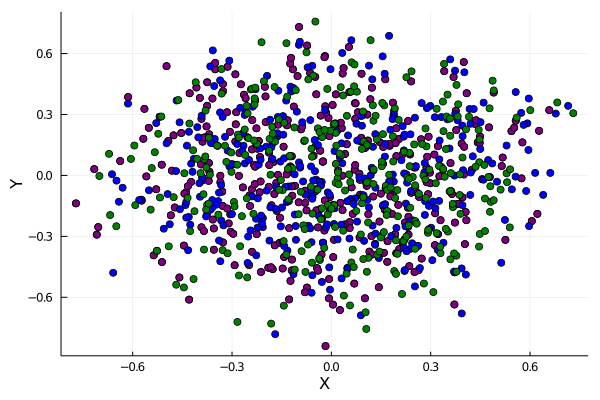

In [333]:
plot(Z[(y .== 1)[:],1], Z[(y .== 1)[:],2],st=:scatter, c=colors[1], legend = false, xlabel = "X", ylabel = "Y")
for k = 1:K-1
    plot!(Z[(y .== k)[:],1], Z[(y .== k)[:],2],st=:scatter, c=colors[k], legend = false)
end
plot!(Z[(y .== K)[:],1], Z[(y .== K)[:],2] ,st=:scatter, c=colors[K], legend = false)

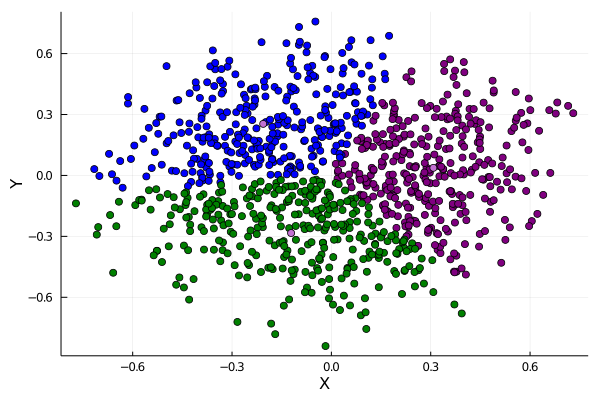

In [334]:
plot(Z[ŷ .== 1,1], Z[ŷ .== 1,2] ,st=:scatter, c=colors[1], legend = false)
for k = 2:K
    plot!(Z[ŷ .== k,1], Z[ŷ .== k,2] ,st=:scatter, c=colors[k], legend = false)
end
plot!(μ_0'[1,:], μ_0'[2,:] ,st=:scatter, xlabel = "X", ylabel = "Y")

In [335]:
using Clustering

# make a random dataset with 1000 random 5-dimensional points
# X = rand(5, 1000)

# cluster X into 20 clusters using K-means
R = kmeans(Z', 3; maxiter=200, display=:iter)

@assert nclusters(R) == 3 # verify the number of clusters

a = assignments(R) # get the assignments of points to clusters
c = counts(R) # get the cluster sizes
M = R.centers # get the cluster centers

  Iters               objv        objv-change | affected 
-------------------------------------------------------------
      0       1.381182e+02
      1       7.824542e+01      -5.987278e+01 |        3
      2       7.299822e+01      -5.247196e+00 |        3
      3       7.213959e+01      -8.586301e-01 |        3
      4       7.192090e+01      -2.186954e-01 |        3
      5       7.187628e+01      -4.461968e-02 |        2
      6       7.186031e+01      -1.596690e-02 |        3
      7       7.185668e+01      -3.632110e-03 |        2
      8       7.185520e+01      -1.478458e-03 |        2
      9       7.185092e+01      -4.278697e-03 |        2
     10       7.184600e+01      -4.918922e-03 |        2
     11       7.183803e+01      -7.973904e-03 |        3
     12       7.183226e+01      -5.773155e-03 |        3
     13       7.183082e+01      -1.438185e-03 |        0
     14       7.183082e+01       0.000000e+00 |        0
K-means converged with 14 iterations (objv = 71.8308178

2×3 Array{Float64,2}:
 0.240356   0.0806966  -0.314129
 0.217658  -0.290743    0.0869565

In [336]:
M

2×3 Array{Float64,2}:
 0.240356   0.0806966  -0.314129
 0.217658  -0.290743    0.0869565

In [337]:
sum(a .== ŷ)/length(y)

0.337

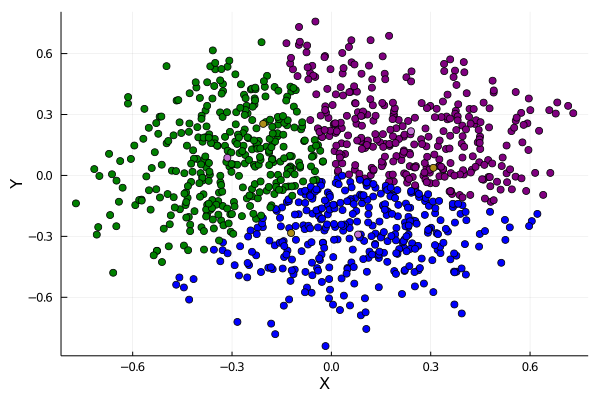

In [338]:
plot(Z[a .== 1,1], Z[a .== 1,2] ,st=:scatter, c=colors[1], legend = false)
for k = 2:K
    plot!(Z[a .== k,1], Z[a .== k,2] ,st=:scatter, c=colors[k], legend = false)
end
plot!(M[1,:], M[2,:] ,st=:scatter, xlabel = "X", ylabel = "Y")
plot!(μ_0'[1,:], μ_0'[2,:] ,st=:scatter, xlabel = "X", ylabel = "Y")